<a href="https://colab.research.google.com/github/jforfab/Estudio/blob/main/Example_eigenfaces.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from sklearn.datasets import fetch_lfw_people
faces=fetch_lfw_people(min_faces_per_person=60)
print(faces.target_names)
print(faces.images.shape)

['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Junichiro Koizumi' 'Tony Blair']
(1348, 62, 47)


In [8]:
from sklearn.decomposition import PCA as RandomizedPCA
pca=RandomizedPCA(150)
pca.fit(faces.data)

PCA(copy=True, iterated_power='auto', n_components=150, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [9]:
import matplotlib.pyplot as plt


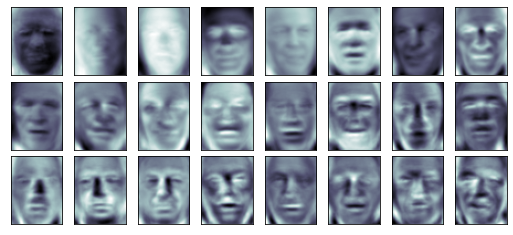

In [12]:
fig, axes = plt.subplots(3, 8 , figsize=(9,4),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.1,wspace=0.1))
for i, ax in enumerate(axes.flat):
  ax.imshow(pca.components_[i].reshape(62,47), cmap='bone')

In [14]:
import numpy as np


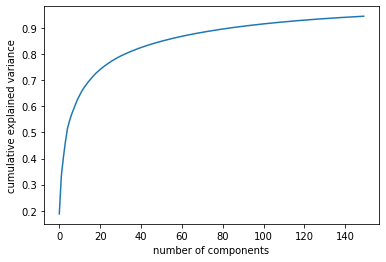

In [15]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

In [16]:
# Compute the components and projected faces
pca = RandomizedPCA(150).fit(faces.data)
components = pca.transform(faces.data)
projected = pca.inverse_transform(components)

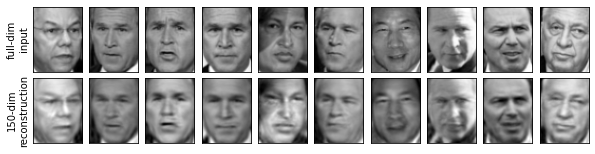

In [17]:
# Plot the results
fig, ax = plt.subplots(2, 10, figsize=(10, 2.5),
subplot_kw={'xticks':[], 'yticks':[]},
gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i in range(10):
  ax[0, i].imshow(faces.data[i].reshape(62, 47), cmap='binary_r')
  ax[1, i].imshow(projected[i].reshape(62, 47), cmap='binary_r')
  ax[0, 0].set_ylabel('full-dim\ninput')
  ax[1, 0].set_ylabel('150-dim\nreconstruction');